In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Customers_df= pd.read_csv('/Users/nithyananthans/OpenClassRoom/OpenClassroom/Project 5/customers.csv');
Products_df= pd.read_csv('/Users/nithyananthans/OpenClassRoom/OpenClassroom/Project 5/products.csv');
Transactions_df= pd.read_csv('/Users/nithyananthans/OpenClassRoom/OpenClassroom/Project 5/transactions.csv');

# Task 1 Data Cleansing

In [3]:
# Outlier analysis in Products dataset
print(Products_df.describe())

             price        categ
count  3287.000000  3287.000000
mean     21.856641     0.370246
std      29.847908     0.615387
min      -1.000000     0.000000
25%       6.990000     0.000000
50%      13.060000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000


In [4]:
num_missing = (Products_df[['price']] < 0).sum()
print(num_missing)

price    1
dtype: int64


In [5]:
Outliner = Products_df.copy()
Outliner.sort_values("price", ascending = True)

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [6]:
# Remove outlier from Products dataset

In [7]:
Products_df.query("id_prod != 'T_0'",inplace = True) 
Products_df

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [8]:
# Outlier analysis in Products dataset
print(Customers_df.describe())

             birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000


In [9]:
def Outlier(string):
    parts = string.split('_')
    first_part = parts[0]
    if first_part != 'c':
        return "Yes"
    else:
        return "No"
Customers_df["Outlier"] = Customers_df["client_id"].apply(Outlier)
Customers_df.sort_values(by="Outlier", ascending=False)

,client_id,sex,birth,Outlier
2735,ct_0,f,2001,Yes
8494,ct_1,m,2001,Yes
0,c_4410,f,1967,No
5751,c_5634,f,1992,No
5746,c_447,f,1982,No
...,...,...,...,...
2870,c_6726,f,1974,No
2869,c_2797,f,1956,No
2868,c_818,m,1961,No
2867,c_3393,f,1956,No


In [10]:
# Remove outlier from Customer dataset

In [11]:
Customers_df.query("Outlier== 'No'",inplace = True) 
Customers_df = Customers_df[["client_id","sex","birth"]].copy()
Customers_df

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [12]:
# Outlier analysis in Transaction dataset
print(Transactions_df.describe())

       id_prod                             date session_id client_id
count   337016                           337016     337016    337016
unique    3266                           336855     169195      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      1081                               13        200     12855


In [13]:
Transactions_df.sort_values(by="id_prod", ascending = False)

,id_prod,date,session_id,client_id
210294,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
75176,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
203418,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
259192,T_0,test_2021-03-01 02:30:02.237444,s_0,ct_0
234706,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_1
...,...,...,...,...
39407,0_0,2021-11-02 02:09:44.616757,s_113493,c_5268
213660,0_0,2021-06-21 14:23:45.803003,s_51771,c_1734
152572,0_0,2021-11-22 01:43:19.488136,s_123150,c_5778
183201,0_0,2022-01-11 19:32:42.579413,s_148386,c_5737


In [14]:
# Remove outlier from Products dataset

In [15]:
Transactions_df.query("id_prod != 'T_0'",inplace = True) 
Transactions_df

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [16]:
# Formating date before use

In [17]:
def first(string):
    parts = string.split(' ')
    first_part = parts[0]
    return first_part
Transactions_df["date"] = Transactions_df["date"].apply(first)
Transactions_df

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10,s_18746,c_4450
1,2_226,2022-02-03,s_159142,c_277
2,1_374,2021-09-23,s_94290,c_4270
3,0_2186,2021-10-17,s_105936,c_4597
4,0_1351,2021-07-17,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28,s_40720,c_3454
337012,0_759,2021-06-19,s_50568,c_6268
337013,0_1256,2021-03-16,s_7219,c_4137
337014,2_227,2021-10-30,s_112349,c_5


In [18]:
# merging datasets

In [19]:
merged = pd.merge(Customers_df, Transactions_df, on=['client_id'], how='right')
merged

,client_id,sex,birth,id_prod,date,session_id
0,c_4450,f,1977,0_1483,2021-04-10,s_18746
1,c_277,f,2000,2_226,2022-02-03,s_159142
2,c_4270,f,1979,1_374,2021-09-23,s_94290
3,c_4597,m,1963,0_2186,2021-10-17,s_105936
4,c_1242,f,1980,0_1351,2021-07-17,s_63642
...,...,...,...,...,...,...
336811,c_3454,m,1969,1_671,2021-05-28,s_40720
336812,c_6268,m,1991,0_759,2021-06-19,s_50568
336813,c_4137,f,1968,0_1256,2021-03-16,s_7219
336814,c_5,f,1994,2_227,2021-10-30,s_112349


In [20]:
Source = pd.merge(Products_df, merged, on=['id_prod'], how='right')
Source

,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1483,4.99,0.0,c_4450,f,1977,2021-04-10,s_18746
1,2_226,65.75,2.0,c_277,f,2000,2022-02-03,s_159142
2,1_374,10.71,1.0,c_4270,f,1979,2021-09-23,s_94290
3,0_2186,4.20,0.0,c_4597,m,1963,2021-10-17,s_105936
4,0_1351,8.99,0.0,c_1242,f,1980,2021-07-17,s_63642
...,...,...,...,...,...,...,...,...
336811,1_671,31.99,1.0,c_3454,m,1969,2021-05-28,s_40720
336812,0_759,22.99,0.0,c_6268,m,1991,2021-06-19,s_50568
336813,0_1256,11.03,0.0,c_4137,f,1968,2021-03-16,s_7219
336814,2_227,50.99,2.0,c_5,f,1994,2021-10-30,s_112349


In [21]:
# Looking for missing values in merged dataset

In [22]:
Source[Source.isna().any(axis=1)]

,id_prod,price,categ,client_id,sex,birth,date,session_id
6231,0_2245,NaN,NaN,c_1533,m,1972,2021-06-17,s_49705
10797,0_2245,NaN,NaN,c_7954,m,1973,2021-06-16,s_49323
14045,0_2245,NaN,NaN,c_5120,f,1975,2021-11-24,s_124474
17480,0_2245,NaN,NaN,c_4964,f,1982,2022-02-28,s_172304
21071,0_2245,NaN,NaN,c_580,m,1988,2021-03-01,s_3
...,...,...,...,...,...,...,...,...
322523,0_2245,NaN,NaN,c_4167,f,1979,2021-04-06,s_16936
329226,0_2245,NaN,NaN,c_7790,f,1983,2021-03-30,s_13738
330297,0_2245,NaN,NaN,c_6189,f,1984,2021-12-03,s_128815
335331,0_2245,NaN,NaN,c_1595,f,1973,2021-04-27,s_26624


In [23]:
DF_2245 = Source.copy()
DF_2245.query('id_prod == "0_2245"', inplace = True)
DF_2245

,id_prod,price,categ,client_id,sex,birth,date,session_id
6231,0_2245,NaN,NaN,c_1533,m,1972,2021-06-17,s_49705
10797,0_2245,NaN,NaN,c_7954,m,1973,2021-06-16,s_49323
14045,0_2245,NaN,NaN,c_5120,f,1975,2021-11-24,s_124474
17480,0_2245,NaN,NaN,c_4964,f,1982,2022-02-28,s_172304
21071,0_2245,NaN,NaN,c_580,m,1988,2021-03-01,s_3
...,...,...,...,...,...,...,...,...
322523,0_2245,NaN,NaN,c_4167,f,1979,2021-04-06,s_16936
329226,0_2245,NaN,NaN,c_7790,f,1983,2021-03-30,s_13738
330297,0_2245,NaN,NaN,c_6189,f,1984,2021-12-03,s_128815
335331,0_2245,NaN,NaN,c_1595,f,1973,2021-04-27,s_26624


In [24]:
Prod_ch = Products_df.copy()
Prod_ch.query('id_prod == "0_2245"',inplace = True)
Prod_ch

,id_prod,price,categ


In [25]:
# Clear missing values

In [26]:
Source = Source.dropna()

In [27]:
Source.sort_values(by="date",ascending = False)
Source

,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1483,4.99,0.0,c_4450,f,1977,2021-04-10,s_18746
1,2_226,65.75,2.0,c_277,f,2000,2022-02-03,s_159142
2,1_374,10.71,1.0,c_4270,f,1979,2021-09-23,s_94290
3,0_2186,4.20,0.0,c_4597,m,1963,2021-10-17,s_105936
4,0_1351,8.99,0.0,c_1242,f,1980,2021-07-17,s_63642
...,...,...,...,...,...,...,...,...
336811,1_671,31.99,1.0,c_3454,m,1969,2021-05-28,s_40720
336812,0_759,22.99,0.0,c_6268,m,1991,2021-06-19,s_50568
336813,0_1256,11.03,0.0,c_4137,f,1968,2021-03-16,s_7219
336814,2_227,50.99,2.0,c_5,f,1994,2021-10-30,s_112349


# Task 2

In [28]:
from datetime import date
today = str(date.today())
Current_yr = str(today).split('-')[0]
Current_yr= pd.to_numeric(Current_yr)
Current_yr

2021

In [29]:
Source["age"] = Current_yr - Source["birth"]
Source

<ipython-input-29-fb305680f947>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Source["age"] = Current_yr - Source["birth"]


,id_prod,price,categ,client_id,sex,birth,date,session_id,age
0,0_1483,4.99,0.0,c_4450,f,1977,2021-04-10,s_18746,44
1,2_226,65.75,2.0,c_277,f,2000,2022-02-03,s_159142,21
2,1_374,10.71,1.0,c_4270,f,1979,2021-09-23,s_94290,42
3,0_2186,4.20,0.0,c_4597,m,1963,2021-10-17,s_105936,58
4,0_1351,8.99,0.0,c_1242,f,1980,2021-07-17,s_63642,41
...,...,...,...,...,...,...,...,...,...
336811,1_671,31.99,1.0,c_3454,m,1969,2021-05-28,s_40720,52
336812,0_759,22.99,0.0,c_6268,m,1991,2021-06-19,s_50568,30
336813,0_1256,11.03,0.0,c_4137,f,1968,2021-03-16,s_7219,53
336814,2_227,50.99,2.0,c_5,f,1994,2021-10-30,s_112349,27


In [30]:
Source1 = Source[["price","date"]].copy()

In [31]:
Source1 = Source1.groupby(['date']).sum()

In [32]:
Source1_cp = Source1.copy()

In [33]:
Source1["price"].mean()

15881.034986301313

In [34]:
Source1["price"].median()

16065.939999999931

In [35]:
Source1["price"].mode()

0       8076.04
1       8191.08
2       8318.88
3       8601.71
4       8676.67
         ...   
360    19759.58
361    19913.69
362    19997.23
363    20189.72
364    20302.89
Length: 365, dtype: float64

In [36]:
Source1["price"].std()

2221.9674848654568

In [37]:
Source1["price"].max()

20302.890000000094

In [38]:
Source1["price"].min()

8076.039999999949

# Indicator analysis

In [39]:
Source1["price"].describe()

count      365.000000
mean     15881.034986
std       2221.967485
min       8076.040000
25%      15269.520000
50%      16065.940000
75%      17053.060000
max      20302.890000
Name: price, dtype: float64

In [40]:
Source1_cp = Source1_cp.reset_index()

In [41]:
# Before impute
Source1_cp.describe()

,price
count,365.000000
mean,15881.034986
std,2221.967485
min,8076.040000
25%,15269.520000
50%,16065.940000
75%,17053.060000
max,20302.890000


In [42]:
Source1_cp.median()

price    16065.94
dtype: float64

In [43]:
Source1_cp.set_index("date", inplace=True)
Source1_cp

,price
date,
2021-03-01,16416.24
2021-03-02,15337.47
2021-03-03,14751.75
2021-03-04,15047.09
2021-03-05,17173.41
...,...
2022-02-24,20189.72
2022-02-25,18181.96
2022-02-26,19759.58


Text(0.5, 1.0, 'Sales with Missing Values')

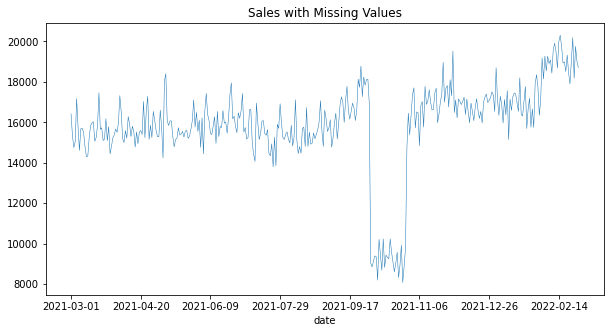

In [44]:
Source1_cp['price'].plot(linewidth=0.5,figsize=(10,5));
plt.title("Sales with Missing Values")

In [45]:
pd.set_option('display.max_rows', 100)

In [46]:
Missing_values = Source.loc[(Source['date'] >= '2021-10-01') & (Source['date'] <= '2021-10-31')]
Missing_values.sort_values(by="categ")

,id_prod,price,categ,client_id,sex,birth,date,session_id,age
3,0_2186,4.20,0.0,c_4597,m,1963,2021-10-17,s_105936,58
216675,0_1476,15.66,0.0,c_887,m,1976,2021-10-11,s_103336,45
216665,0_1435,13.99,0.0,c_4783,m,1989,2021-10-16,s_105400,32
216639,0_1491,5.99,0.0,c_339,f,1980,2021-10-23,s_108783,41
216619,0_1285,4.99,0.0,c_4483,m,1982,2021-10-30,s_112155,39
...,...,...,...,...,...,...,...,...,...
127257,2_207,50.99,2.0,c_4958,m,1999,2021-10-30,s_112282,22
292761,2_46,41.31,2.0,c_7337,m,2002,2021-10-16,s_105602,19
189719,2_226,65.75,2.0,c_7554,f,2001,2021-10-12,s_103722,20
292528,2_169,111.99,2.0,c_4958,m,1999,2021-10-04,s_99834,22


In [47]:
Missing_values_categ0 = Source.loc[(Source['date'] >= '2021-10-01') & (Source['date'] <= '2021-10-31')&(Source['categ']==0.0)]
Missing_values_categ0

,id_prod,price,categ,client_id,sex,birth,date,session_id,age
3,0_2186,4.20,0.0,c_4597,m,1963,2021-10-17,s_105936,58
10,0_423,1.99,0.0,c_2225,f,1949,2021-10-09,s_102501,72
12,0_1368,5.13,0.0,c_857,m,1985,2021-10-02,s_98886,36
14,0_1207,16.99,0.0,c_648,m,1976,2021-10-12,s_103927,45
17,0_1452,13.77,0.0,c_6297,f,1969,2021-10-15,s_105078,52
...,...,...,...,...,...,...,...,...,...
336763,0_1452,13.77,0.0,c_1938,f,1979,2021-10-07,s_101119,42
336767,0_1159,7.99,0.0,c_772,f,1996,2021-10-25,s_109915,25
336772,0_1008,4.73,0.0,c_4468,f,1983,2021-10-24,s_109564,38
336796,0_1526,6.62,0.0,c_6341,m,1975,2021-10-05,s_100453,46


In [48]:
Missing_values_categ1 = Source.loc[(Source['date'] >= '2021-10-01') & (Source['date'] <= '2021-10-31')&(Source['categ']==1.0)]
Missing_values_categ1

,id_prod,price,categ,client_id,sex,birth,date,session_id,age
331,1_348,16.15,1.0,c_2543,m,1952,2021-10-01,s_98327,69
344,1_435,11.99,1.0,c_7146,m,1971,2021-10-28,s_111122,50
656,1_392,18.11,1.0,c_6516,m,1967,2021-10-28,s_111152,54
727,1_311,16.99,1.0,c_1666,m,1951,2021-10-30,s_112125,70
1377,1_398,10.17,1.0,c_6588,m,1963,2021-10-28,s_111267,58
...,...,...,...,...,...,...,...,...,...
336410,1_392,18.11,1.0,c_3150,m,1970,2021-10-31,s_112835,51
336602,1_425,16.99,1.0,c_8549,f,1967,2021-10-31,s_112921,54
336662,1_23,23.99,1.0,c_3047,f,1969,2021-10-28,s_111495,52
336733,1_390,8.58,1.0,c_4450,f,1977,2021-10-30,s_112221,44


In [49]:
Missing_values_categ2 = Source.loc[(Source['date'] >= '2021-10-01') & (Source['date'] <= '2021-10-31')&(Source['categ']==2.0)]
Missing_values_categ2

,id_prod,price,categ,client_id,sex,birth,date,session_id,age
163,2_227,50.99,2.0,c_5841,m,1996,2021-10-22,s_108583,25
260,2_233,172.99,2.0,c_4958,m,1999,2021-10-03,s_99180,22
744,2_156,188.48,2.0,c_4144,f,1998,2021-10-06,s_100630,23
1225,2_109,53.99,2.0,c_4395,m,2002,2021-10-11,s_103051,19
1338,2_202,67.57,2.0,c_4861,m,1989,2021-10-29,s_111795,32
...,...,...,...,...,...,...,...,...,...
334488,2_154,96.74,2.0,c_3949,m,1993,2021-10-24,s_109607,28
334652,2_10,60.37,2.0,c_7488,m,1995,2021-10-22,s_108368,26
335342,2_112,67.57,2.0,c_8091,f,2004,2021-10-04,s_99889,17
335886,2_208,54.87,2.0,c_962,m,2004,2021-10-30,s_112286,17


In [50]:
# Imputing missing value with median value

In [51]:
Source1_cp.loc['2021-10-01':'2021-10-31'] = 16065.94

Text(0.5, 1.0, 'Sales with Median Impute')

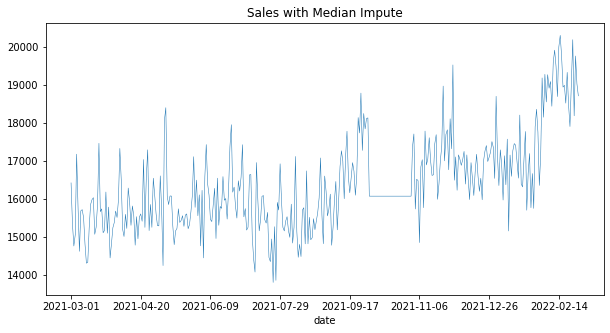

In [52]:
Source1_cp['price'].plot(linewidth=0.5,figsize=(10,5));
plt.title("Sales with Median Impute")

In [53]:
#After impute
Source1_cp.describe()

,price
count,365.000000
mean,16371.128630
std,1216.584849
min,13792.210000
25%,15524.870000
50%,16065.940000
75%,17053.060000
max,20302.890000


In [54]:
# Lorenz and Gini Coefficient analysis before imputing values

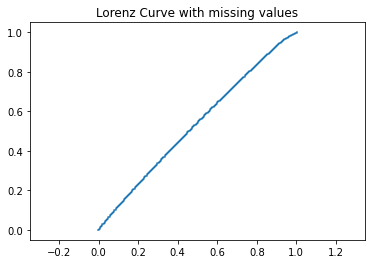

In [55]:
expenses = Source1['price']
exp = -expenses.values
n = len(exp)
lorenz = np.cumsum(np.sort(exp)) / exp.sum()
lorenz = np.append([0],lorenz) # The Lorenz Curve begins at 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. The first segment starts at 0-1/n and the last one finishes at 1+1/n
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Lorenz Curve with missing values")
plt.show()

In [56]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

-0.06805248803596542

In [57]:
Source1_cp = Source1_cp.reset_index()

In [58]:
Source1_cp['date']  = pd.to_datetime(Source1_cp['date']) 
Source1_cp

,date,price
0,2021-03-01,16416.24
1,2021-03-02,15337.47
2,2021-03-03,14751.75
3,2021-03-04,15047.09
4,2021-03-05,17173.41
...,...,...
360,2022-02-24,20189.72
361,2022-02-25,18181.96
362,2022-02-26,19759.58
363,2022-02-27,19021.83


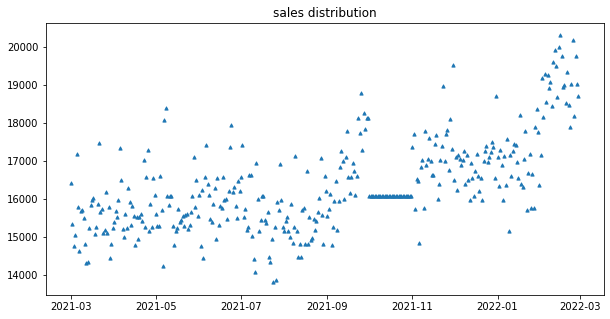

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(Source1_cp.date,Source1_cp.price,marker="^",s=10)
plt.title("sales distribution")
plt.show()

In [60]:
# Lorenz and Gini Coefficient analysis after imputing missing values

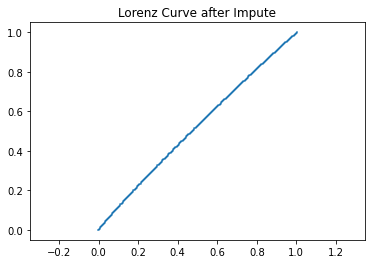

In [61]:
expenses = Source1_cp['price']
exp = -expenses.values
n = len(exp)
lorenz = np.cumsum(np.sort(exp)) / exp.sum()
lorenz = np.append([0],lorenz) # The Lorenz Curve begins at 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. The first segment starts at 0-1/n and the last one finishes at 1+1/n
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Lorenz Curve after Impute")
plt.show()

In [62]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

-0.04067842306409131

In [63]:
Categ_his = Source[["categ","price"]].copy()

In [64]:
Categ_his = Categ_his.groupby("categ").sum()

Text(0.5, 1.0, 'Annual Sales - by Category')

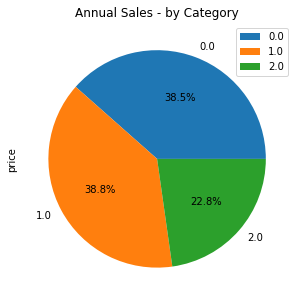

In [65]:
Categ_his.plot.pie(subplots=True,autopct='%0.1f%%',figsize=(10, 5))
plt.title("Annual Sales - by Category")

In [66]:
Customers_df["age"] = Current_yr - Customers_df["birth"]
Customers_df

,client_id,sex,birth,age
0,c_4410,f,1967,54
1,c_7839,f,1975,46
2,c_1699,f,1984,37
3,c_5961,f,1962,59
4,c_5320,m,1943,78
...,...,...,...,...
8618,c_7920,m,1956,65
8619,c_7403,f,1970,51
8620,c_5119,m,1974,47
8621,c_5643,f,1968,53


# Age Group analysis

In [67]:
Customers_df['Age_grp'] = np.select(
    [
        Customers_df['age'].between(15, 24, inclusive=True), 
        Customers_df['age'].between(25, 34, inclusive=True),
        Customers_df['age'].between(35, 44, inclusive=True),
        Customers_df['age'].between(45, 54, inclusive=True),
        Customers_df['age'].between(55, 64, inclusive=True),
    ], 
    [
        '15-24',
        '25-34',
        '35-44',
        '45-54',
        '55-64',
    ], 
    default='65+'
)

In [68]:
Categ_age= Customers_df.groupby("Age_grp").size()

Text(0.5, 1.0, 'Age Distribution of Customers')

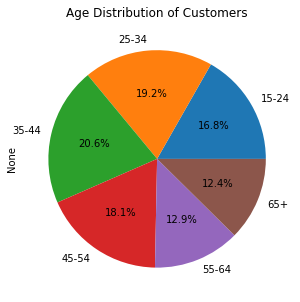

In [69]:
Categ_age.plot.pie(subplots=True,autopct='%0.1f%%',figsize=(10, 5))
plt.title('Age Distribution of Customers')

In [70]:
Source['Age_grp'] = np.select(
    [
        Source['age'].between(15, 24, inclusive=True), 
        Source['age'].between(25, 34, inclusive=True),
        Source['age'].between(35, 44, inclusive=True),
        Source['age'].between(45, 54, inclusive=True),
        Source['age'].between(55, 64, inclusive=True),
    ], 
    [
        '15-24',
        '25-34',
        '35-44',
        '45-54',
        '55-64',
    ], 
    default='65+'
)

<ipython-input-70-e05fb6cff1d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Source['Age_grp'] = np.select(


In [71]:
Categ_age_cus= Source.groupby("Age_grp").size()

Text(0.5, 1.0, 'Age Distribution of Ordering Customers')

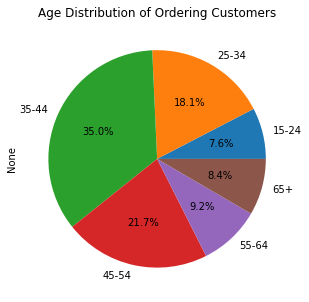

In [72]:
Categ_age_cus.plot.pie(subplots=True,autopct='%0.1f%%',figsize=(10, 5))
plt.title('Age Distribution of Ordering Customers')

In [73]:
Source_age_grp = Source[["Age_grp","categ"]].copy()
Source_age_grp["size"] = 1
Source_age_grp

,Age_grp,categ,size
0,35-44,0.0,1
1,15-24,2.0,1
2,35-44,1.0,1
3,55-64,0.0,1
4,35-44,0.0,1
...,...,...,...
336811,45-54,1.0,1
336812,25-34,0.0,1
336813,45-54,0.0,1
336814,25-34,2.0,1


In [74]:
Source_age_grp['categ'] = np.select(
    [
        Source_age_grp['categ']==0.0,
        Source_age_grp['categ']==1.0,
        Source_age_grp['categ']==2.0,
     ], 
    [
        'Categ - 0',
        'Categ - 1',
        'Categ - 2',
    ], 
    default='NA'
)

In [75]:
Source_age_grp

,Age_grp,categ,size
0,35-44,Categ - 0,1
1,15-24,Categ - 2,1
2,35-44,Categ - 1,1
3,55-64,Categ - 0,1
4,35-44,Categ - 0,1
...,...,...,...
336811,45-54,Categ - 1,1
336812,25-34,Categ - 0,1
336813,45-54,Categ - 0,1
336814,25-34,Categ - 2,1


In [76]:
Source_age_grp = Source_age_grp.pivot_table(index='Age_grp', columns='categ',aggfunc='sum')
Source_age_grp

size                    
categ   Categ - 0 Categ - 1 Categ - 2
Age_grp                              
15-24        5378      9491     10751
25-34       39835     15610      5526
35-44       90859     26781       306
45-54       47092     25478       474
55-64       13787     16817       265
65+         12475     15558       230

In [77]:
Source_age_grp = Source_age_grp.reset_index()
Source_age_grp

Age_grp      size                    
categ         Categ - 0 Categ - 1 Categ - 2
0       15-24      5378      9491     10751
1       25-34     39835     15610      5526
2       35-44     90859     26781       306
3       45-54     47092     25478       474
4       55-64     13787     16817       265
5         65+     12475     15558       230

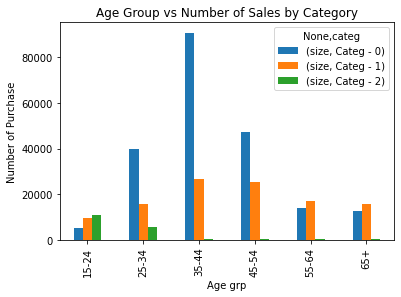

In [78]:
Source_age_grp.plot(x="Age_grp", kind="bar")
plt.xlabel("Age grp")
plt.ylabel("Number of Purchase")
plt.title("Age Group vs Number of Sales by Category")
plt.show()

Text(0.5, 1.0, 'Age Group vs Number of Sales by category')

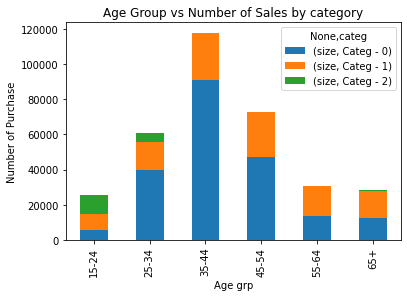

In [79]:
Source_age_grp.plot.bar(x="Age_grp", stacked=True);
plt.xlabel("Age grp")
plt.ylabel("Number of Purchase")
plt.title("Age Group vs Number of Sales by category")

In [80]:
Customer_categ = Source[["categ","Age_grp"]].copy()
Customer_categ["size"] = 1
Customer_categ = Customer_categ.groupby(['Age_grp','categ']).sum()
Customer_categ=Customer_categ.reset_index()

In [81]:
Customer_categ

,Age_grp,categ,size
0,15-24,0.0,5378
1,15-24,1.0,9491
2,15-24,2.0,10751
3,25-34,0.0,39835
4,25-34,1.0,15610
5,25-34,2.0,5526
6,35-44,0.0,90859
7,35-44,1.0,26781
8,35-44,2.0,306
9,45-54,0.0,47092


Text(0.5, 1.0, 'Correlation between Age Group and ')

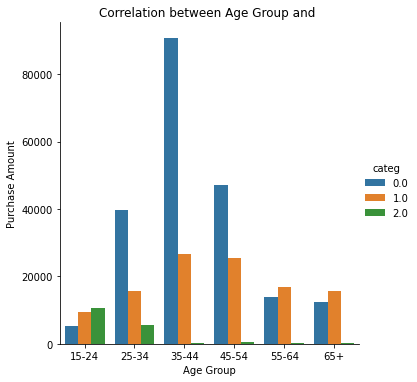

In [82]:
sns.catplot(x = "Age_grp",       # x variable name
            y = "size",       # y variable name
            hue = "categ",  # group variable name
            data = Customer_categ,     # dataframe to plot
            kind = "bar")
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")
plt.title("Correlation between Age Group and ")

# Sales Analysis

In [83]:
Sales_df = Source[["date","price"]].copy()
Sales_df["Sales_count"] = 1
Sales_df = Sales_df.groupby(['date']).sum()
Sales_df

,price,Sales_count
date,,
2021-03-01,16416.24,960
2021-03-02,15337.47,937
2021-03-03,14751.75,905
2021-03-04,15047.09,901
2021-03-05,17173.41,939
...,...,...
2022-02-24,20189.72,1075
2022-02-25,18181.96,988
2022-02-26,19759.58,1101


In [84]:
Sales_df = Sales_df.reset_index()

In [85]:
Sales_df['date'] = pd.to_datetime(Sales_df['date'], errors='coerce')

In [86]:
Sales_df

,date,price,Sales_count
0,2021-03-01,16416.24,960
1,2021-03-02,15337.47,937
2,2021-03-03,14751.75,905
3,2021-03-04,15047.09,901
4,2021-03-05,17173.41,939
...,...,...,...
360,2022-02-24,20189.72,1075
361,2022-02-25,18181.96,988
362,2022-02-26,19759.58,1101
363,2022-02-27,19021.83,1108


No handles with labels found to put in legend.


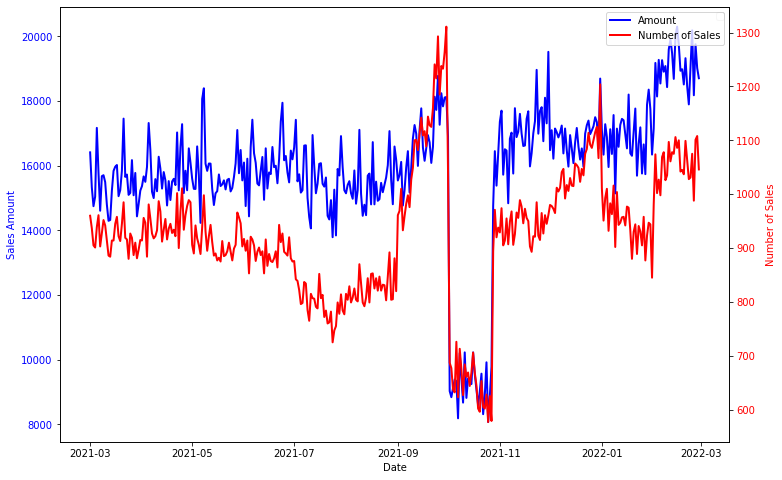

In [87]:
from pylab import figure, show, legend, ylabel
 
fig= plt.figure (figsize=(12,8)) 
leg = plt.legend();
# Plot y1 vs x in blue on the left vertical axis.
plt.xlabel("Date")
plt.ylabel("Sales Amount", color="b")
plt.tick_params(axis="y", labelcolor="b")
line1 = plt.plot(Sales_df.date, Sales_df.price, "b-", linewidth=2,label='Amount')
#plt.legend(loc='upper left', frameon=False)
 
# Plot y2 vs x in red on the right vertical axis.
plt.twinx()
plt.ylabel("Number of Sales", color="r")
plt.tick_params(axis="y", labelcolor="r")
line2 = plt.plot(Sales_df.date, Sales_df.Sales_count, "r-", linewidth=2, label = 'Number of Sales')
plt.savefig("Two axes.png", dpi=75, format="png")
#plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
#plt.legend(loc='upper right', frameon=False)


handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

plt.show()
plt.close()

In [88]:
Sales_df_sample = Sales_df.copy()
Sales_df_sample.date=pd.to_datetime(Sales_df_sample.date)
Sales_df_sample.date=Sales_df_sample.date.dt.strftime('%Y-%m')
Sales_df_sample = Sales_df_sample.groupby("date").sum()
Sales_df_sample =Sales_df_sample.reset_index()

No handles with labels found to put in legend.


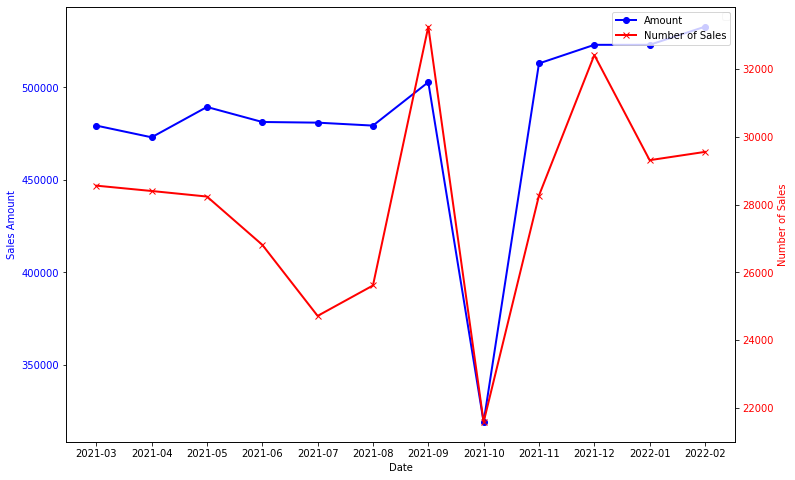

In [89]:
from pylab import figure, show, legend, ylabel
 
fig= plt.figure (figsize=(12,8)) 
leg = plt.legend();
# Plot y1 vs x in blue on the left vertical axis.
plt.xlabel("Date")
plt.ylabel("Sales Amount", color="b")
plt.tick_params(axis="y", labelcolor="b")
line1 = plt.plot(Sales_df_sample.date, Sales_df_sample.price, "b-", linewidth=2,marker='o',label='Amount')
#plt.legend(loc='upper left', frameon=False)
 
# Plot y2 vs x in red on the right vertical axis.
plt.twinx()
plt.ylabel("Number of Sales", color="r")
plt.tick_params(axis="y", labelcolor="r")
line2 = plt.plot(Sales_df_sample.date, Sales_df_sample.Sales_count, "r-", linewidth=2,marker='x',label = 'Number of Sales')
plt.savefig("Two axes.png", dpi=75, format="png")
#plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
#plt.legend(loc='upper left', frameon=False)


handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

plt.show()
plt.close()

In [90]:
Source_mon_sales = Source[["date","price","categ"]].copy()
Source_mon_sales.date=pd.to_datetime(Source_mon_sales.date)
Source_mon_sales.date=Source_mon_sales.date.dt.strftime('%Y-%m')

In [91]:
Source_mon_sales = Source_mon_sales.pivot_table(index='date', columns='categ',aggfunc='sum')

In [92]:
Source_mon_sales = Source_mon_sales.reset_index()

In [93]:
Source_mon_sales

date      price                      
categ                 0.0        1.0        2.0
0      2021-03  193566.38  186974.17   98771.48
1      2021-04  205159.67  156138.35  111682.70
2      2021-05  196114.96  165893.40  127359.59
3      2021-06  167886.34  189162.04  124209.56
4      2021-07  144711.92  188523.27  147663.47
5      2021-08  167677.82  162991.38  148635.99
6      2021-09  246264.21  190613.78   65893.29
7      2021-10  199217.94   33762.32   86179.70
8      2021-11  155843.78  252910.39  104136.00
9      2021-12  205976.44  251026.75   65934.49
10     2022-01  164162.67  256267.92  102524.72
11     2022-02  183140.52  213120.64  136479.72

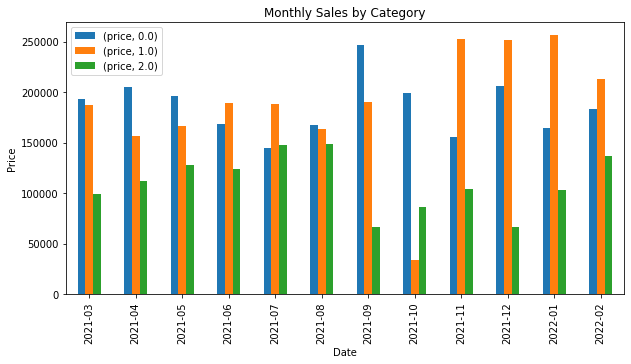

In [94]:
Source_mon_sales.plot(x="date", kind="bar",figsize=(10,5))
plt.legend(loc='upper left')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Monthly Sales by Category")
plt.show()

# Task 3

In [95]:
Source3 = Source[["categ","price","date","sex","birth","id_prod","age"]].copy()
Source3

,categ,price,date,sex,birth,id_prod,age
0,0.0,4.99,2021-04-10,f,1977,0_1483,44
1,2.0,65.75,2022-02-03,f,2000,2_226,21
2,1.0,10.71,2021-09-23,f,1979,1_374,42
3,0.0,4.20,2021-10-17,m,1963,0_2186,58
4,0.0,8.99,2021-07-17,f,1980,0_1351,41
...,...,...,...,...,...,...,...
336811,1.0,31.99,2021-05-28,m,1969,1_671,52
336812,0.0,22.99,2021-06-19,m,1991,0_759,30
336813,0.0,11.03,2021-03-16,f,1968,0_1256,53
336814,2.0,50.99,2021-10-30,f,1994,2_227,27


In [96]:
Source3['categ'] = np.select(
    [
        Source3['categ']==0.0,
        Source3['categ']==1.0,
        Source3['categ']==2.0,
     ], 
    [
        'Category - 0',
        'Category - 1',
        'Category - 2',
    ], 
    default='NA'
)

Text(0.5, 1.0, 'Customer Age vs Purchase Amount')

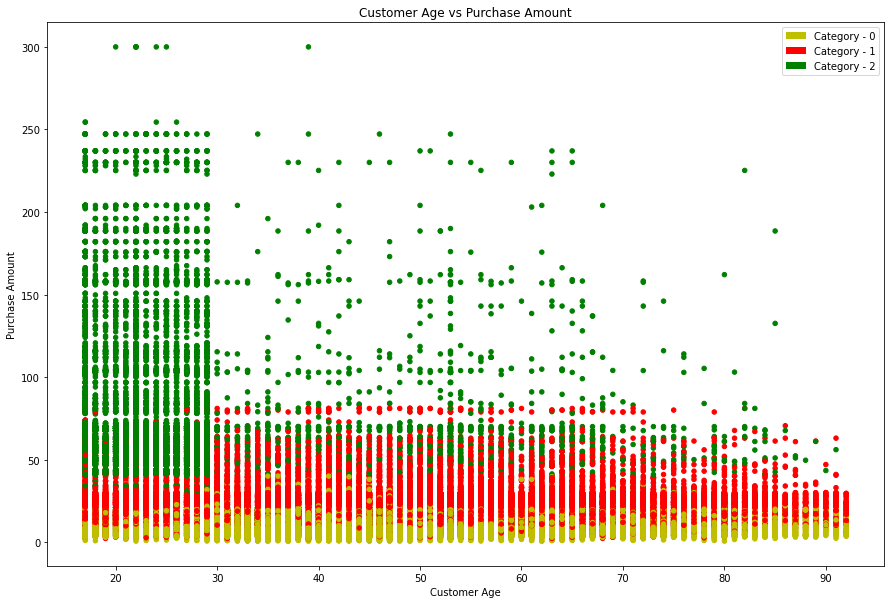

In [97]:
import matplotlib.patches as mpatches

colors=np.where(Source3["categ"]=="Category - 0", 'y', 
         (np.where(Source3["categ"]=="Category - 1", 'r', 'g')))
scatter=Source3.plot.scatter(x="age",y="price", c=colors,figsize=(15,10))


classes = ['Category - 0','Category - 1','Category - 2']
class_colours = ['y','r','g']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc='upper right')
plt.xlabel("Customer Age")
plt.ylabel("Purchase Amount")
#plt.legend(loc=)
plt.title("Customer Age vs Purchase Amount")
#plt.legend(handles=scatter.legend_elements()[0], labels=classes)

In [98]:
Sales_gender = Source[["date","sex","price"]].copy()
Sales_gender.date=pd.to_datetime(Sales_gender.date)
Sales_gender.date=Sales_gender.date.dt.strftime('%Y-%m')

In [99]:
#Sales_gender = Sales_gender.pivot_table(index='date', columns='sex',values = 'price', aggfunc='sum')

In [100]:
#Sales_gender = Sales_gender.reset_index()
Sales_gender 

,date,sex,price
0,2021-04,f,4.99
1,2022-02,f,65.75
2,2021-09,f,10.71
3,2021-10,m,4.20
4,2021-07,f,8.99
...,...,...,...
336811,2021-05,m,31.99
336812,2021-06,m,22.99
336813,2021-03,f,11.03
336814,2021-10,f,50.99


Text(0.5, 1.0, 'Sales distibution categorized by Gender')

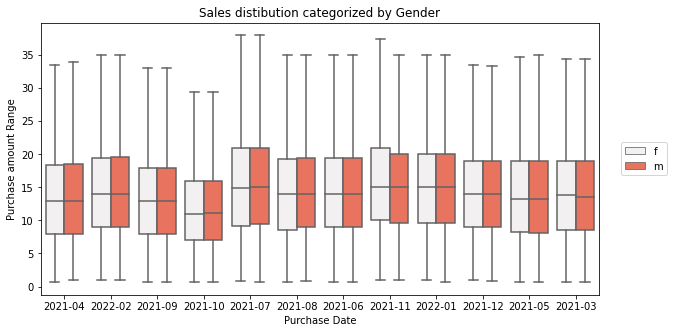

In [101]:
plt.figure(figsize=(10,5))
Box = sns.boxplot(x='date', y='price', data=Sales_gender, showfliers=False, color='tomato', hue='sex')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.xlabel("Purchase Date")
plt.ylabel("Purchase amount Range")
plt.title("Sales distibution categorized by Gender")

In [102]:
Customer_categ_copy = Customer_categ[["Age_grp","size"]].copy()
Customer_categ_copy

,Age_grp,size
0,15-24,5378
1,15-24,9491
2,15-24,10751
3,25-34,39835
4,25-34,15610
5,25-34,5526
6,35-44,90859
7,35-44,26781
8,35-44,306
9,45-54,47092


Text(0, 0.5, 'Purchase Amount')

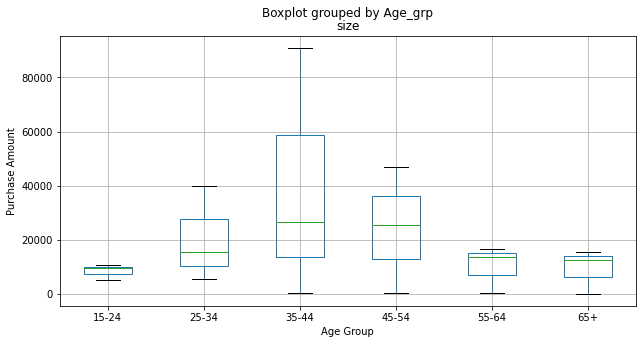

In [103]:
Customer_categ_copy.boxplot(by="Age_grp",figsize=(10,5))
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")

In [104]:
Sales_age_grp = Source[["Age_grp","price"]].copy()

Text(0, 0.5, 'Number of purchase')

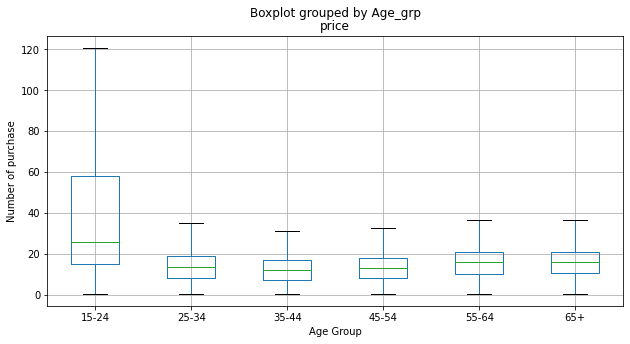

In [105]:
Sales_age_grp.boxplot(by="Age_grp",showfliers=False,figsize=(10,5))
plt.xlabel("Age Group")
plt.ylabel("Number of purchase")

In [106]:
Basket_size = Source[["session_id","Age_grp"]].copy()
Basket_size.sort_values(by="session_id", ascending=False)
Basket_size["size"] = 1
Basket_size = Basket_size.groupby(["Age_grp","session_id"]).sum()

In [107]:
Basket_size= Basket_size.reset_index()

In [108]:
Basket_size

,Age_grp,session_id,size
0,15-24,s_100017,1
1,15-24,s_10002,1
2,15-24,s_100020,5
3,15-24,s_100056,1
4,15-24,s_100057,1
...,...,...,...
169168,65+,s_99949,1
169169,65+,s_99950,1
169170,65+,s_99971,1
169171,65+,s_99986,1


Text(0, 0.5, 'Basket Size')

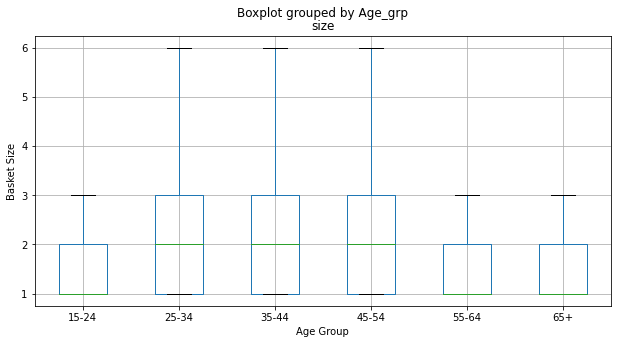

In [109]:
Basket_size.boxplot(by="Age_grp",showfliers=False,figsize=(10,5))
plt.xlabel("Age Group")
plt.ylabel("Basket Size")

In [110]:
Sales_hp = Source[["sex","categ","price"]].copy()
Sales_hp["size"] = 1
Sales_hp = Sales_hp.groupby(["sex","categ"]).sum()
Sales_hp = Sales_hp.reset_index()
Sales_hp

,sex,categ,price,size
0,f,0.0,1103465.97,103786
1,f,1.0,1137856.49,55469
2,f,2.0,617799.31,8260
3,m,0.0,1126256.68,105640
4,m,1.0,1109527.92,54266
5,m,2.0,701671.40,9292


In [111]:
Sales_hp = Sales_hp.pivot("sex","categ","size")

<AxesSubplot:xlabel='categ', ylabel='sex'>

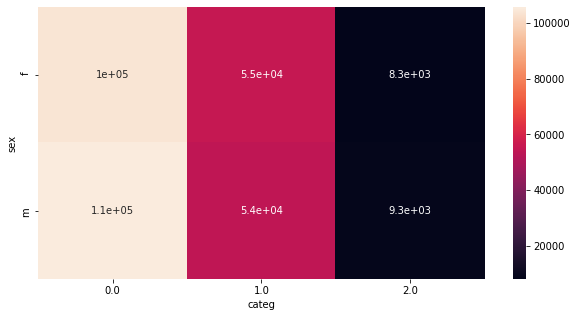

In [112]:
plt.figure(figsize=(10,5))
sns.heatmap(Sales_hp,annot=True)

In [113]:
Sales_hp2 = Source[["Age_grp","categ","price"]].copy()
Sales_hp2["size"] = 1
Sales_hp2 = Sales_hp2.groupby(["Age_grp","categ"]).sum()
Sales_hp2 = Sales_hp2.reset_index()
Sales_hp2

,Age_grp,categ,price,size
0,15-24,0.0,57584.91,5378
1,15-24,1.0,194978.75,9491
2,15-24,2.0,812237.95,10751
3,25-34,0.0,425006.54,39835
4,25-34,1.0,319772.78,15610
5,25-34,2.0,411295.80,5526
6,35-44,0.0,967614.96,90859
7,35-44,1.0,546891.52,26781
8,35-44,2.0,24152.64,306
9,45-54,0.0,500206.53,47092


In [114]:
Sales_hp2 = Sales_hp2.pivot("Age_grp","categ","size")

<AxesSubplot:xlabel='categ', ylabel='Age_grp'>

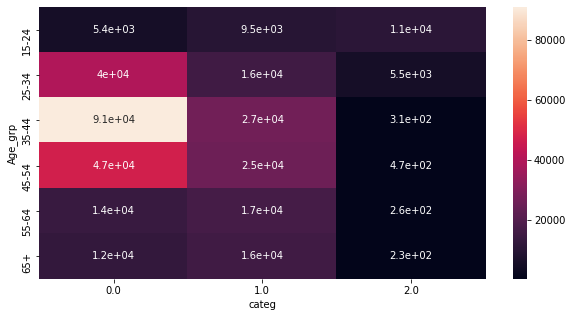

In [115]:
plt.figure(figsize=(10,5))
sns.heatmap(Sales_hp2,annot=True)

In [116]:
Source_age_grp = Source[["sex","categ","price"]].copy()
Source_age_grp

,sex,categ,price
0,f,0.0,4.99
1,f,2.0,65.75
2,f,1.0,10.71
3,m,0.0,4.20
4,f,0.0,8.99
...,...,...,...
336811,m,1.0,31.99
336812,m,0.0,22.99
336813,f,0.0,11.03
336814,f,2.0,50.99


In [117]:
Source_age_grp = Source_age_grp.groupby(["sex","categ"]).sum()
Source_age_grp = Source_age_grp.reset_index()

In [118]:
test_3 = Source_age_grp.pivot("sex","categ","price")
test_3

categ,0.0,1.0,2.0
sex,,,
f,1103465.97,1137856.49,617799.31
m,1126256.68,1109527.92,701671.40


# Correlation beween Gender and Catgory

<AxesSubplot:xlabel='sex'>

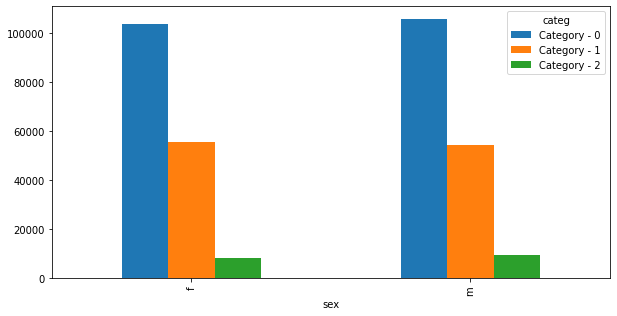

In [119]:
df_ac = Source3.groupby(['sex','categ']).size().unstack(level=1)
df_ac.plot(kind = 'bar',figsize=(10,5))

In [120]:
Source3_1 = Source3[["age","sex","price"]].copy()
Source3_1

,age,sex,price
0,44,f,4.99
1,21,f,65.75
2,42,f,10.71
3,58,m,4.20
4,41,f,8.99
...,...,...,...
336811,52,m,31.99
336812,30,m,22.99
336813,53,f,11.03
336814,27,f,50.99


In [121]:
Source3_1 = Source3_1.groupby(['age']).sum()
Source3_1 = Source3_1.reset_index()

# Correlation between Age and Purchase

<AxesSubplot:xlabel='age'>

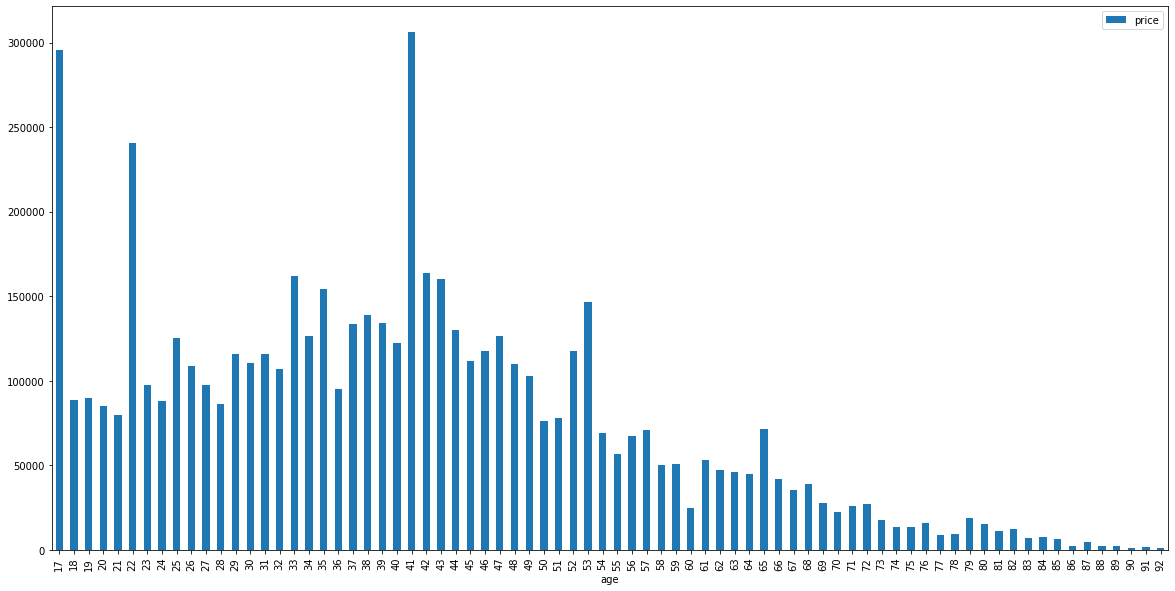

In [122]:
Source3_1.plot(kind='bar',x="age",y="price",figsize=(20,10))

# Correlation between Age and Category

<AxesSubplot:xlabel='age'>

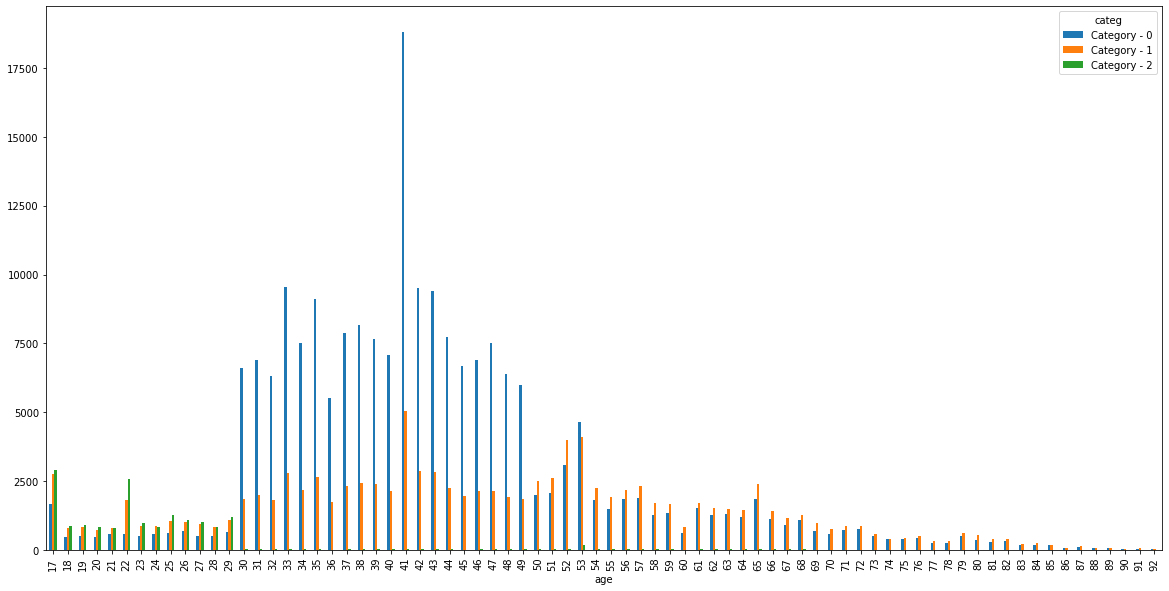

In [123]:
df_ac = Source3.groupby(['age','categ']).size().unstack(level=1)
df_ac.plot(kind = 'bar',figsize=(20,10))

In [124]:
Source3

,categ,price,date,sex,birth,id_prod,age
0,Category - 0,4.99,2021-04-10,f,1977,0_1483,44
1,Category - 2,65.75,2022-02-03,f,2000,2_226,21
2,Category - 1,10.71,2021-09-23,f,1979,1_374,42
3,Category - 0,4.20,2021-10-17,m,1963,0_2186,58
4,Category - 0,8.99,2021-07-17,f,1980,0_1351,41
...,...,...,...,...,...,...,...
336811,Category - 1,31.99,2021-05-28,m,1969,1_671,52
336812,Category - 0,22.99,2021-06-19,m,1991,0_759,30
336813,Category - 0,11.03,2021-03-16,f,1968,0_1256,53
336814,Category - 2,50.99,2021-10-30,f,1994,2_227,27
